In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Miqdad Hilya Hasan_202331085

# Membaca dan melihat atribut citra

(1371, 1920)


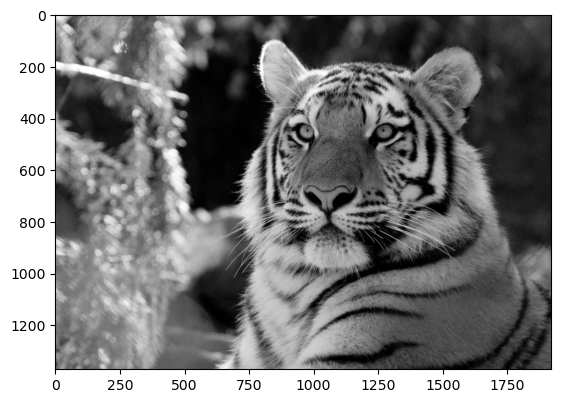

In [8]:
harimau = cv2.imread("harimau_siberia.jpg")
harimau = cv2.cvtColor(harimau, cv2.COLOR_BGR2GRAY)
print(harimau.shape)

plt.imshow(harimau, cmap="gray")
#Miqdad Hilya Hasan_202331085

# Menyiapkan kernel konvolusi

In [11]:
kernel = np.array([[-1, 0, -1],
                  [0, 4, 0],
                  [-1, 0, -1]])
#Miqdad Hilya Hasan_202331085

# memproses citra dengan konvolusi menggunakan FILTER2D

<function matplotlib.pyplot.show(close=None, block=None)>

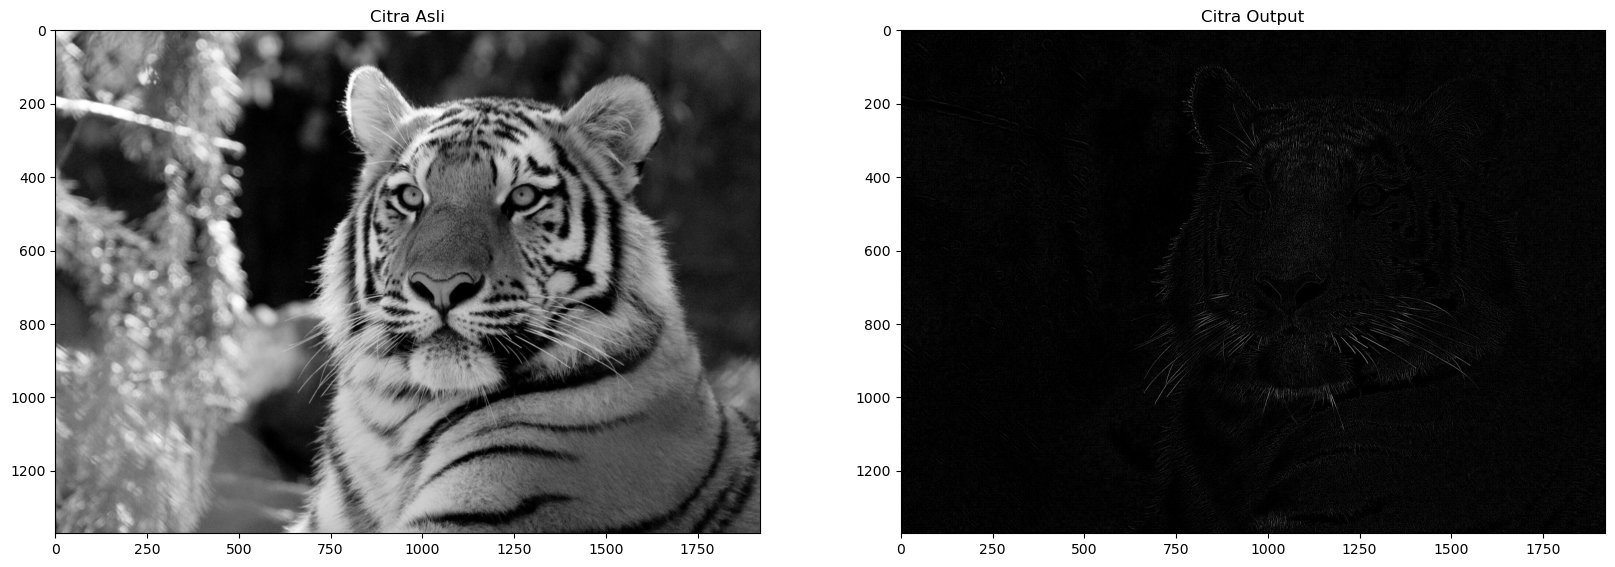

In [14]:
outputharimau = cv2.filter2D(harimau, -1, kernel)

fig, axs = plt.subplots(1,2, figsize=(20,20))
ax = axs.ravel()

ax[0].imshow(harimau, cmap="gray")
ax[0].set_title("Citra Asli")

ax[1].imshow(outputharimau, cmap="gray")
ax[1].set_title("Citra Output")

plt.show
#Miqdad Hilya Hasan_202331085

In [16]:
from skimage.util import random_noise
#Miqdad Hilya Hasan_202331085

(-0.5, 1919.5, 1370.5, -0.5)

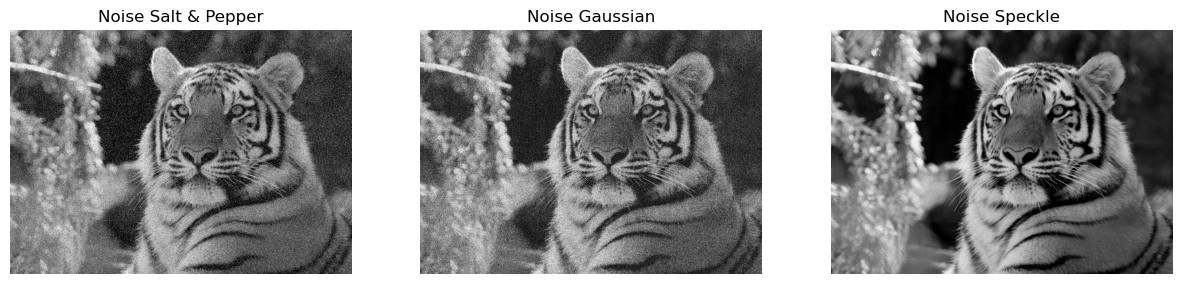

In [44]:
noise_img_snp = random_noise(harimau, mode= "s&p", amount = 0.2)

#add gaussioan noise to the image
noise_img_gaussian = random_noise(harimau, mode= "gaussian", mean = 0, var = 0.1)

#add speckle noise tothe image
noise_img_speckle = random_noise(harimau, mode= "speckle")

noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8')
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype = 'uint8')
noise_img_speckle = np.array(255*noise_img_speckle, dtype = 'uint8')

fig, axs = plt.subplots(1, 3, figsize=(15, 15))  # 3 baris x 3 kolom
ax = axs.ravel()  # ubah jadi array 1 dimensi untuk akses mudah

# Salt & Pepper
ax[0].imshow(noise_img_snp, cmap="gray")
ax[0].set_title("Noise Salt & Pepper")
ax[0].axis("off")
# Gaussian
ax[1].imshow(noise_img_gaussian, cmap="gray")
ax[1].set_title("Noise Gaussian")
ax[1].axis("off")
# Speckle
ax[2].imshow(noise_img_speckle, cmap="gray")
ax[2].set_title("Noise Speckle")
ax[2].axis("off")
#Miqdad Hilya Hasan_202331085

In [32]:
#membuat kernel 3*3 yang bernilai 1/9
#image reduction

kernel_3_3 = np.ones((3,3), np.float32)/9

In [34]:
#melakukan konvolusi untuk mengatasi noise salt dan pepper dengan function
img_snp_avg_filter = cv2.filter2D(noise_img_snp, cv2.CV_8U, kernel_3_3,
                                  (-1, -1), delta=0,
                                  borderType = cv2.BORDER_DEFAULT)
img_snp_median_filter = cv2.medianBlur(noise_img_snp, 3)

In [36]:
#melakukan konvolusi untuk mengatasi noise gaussian dengan function filter
img_gaussian_avg_filter = cv2.filter2D(noise_img_gaussian, cv2.CV_8U, kernel_3_3,
                                  (-1, -1), delta=0,
                                  borderType = cv2.BORDER_DEFAULT)
img_gaussian_median_filter = cv2.medianBlur(noise_img_gaussian, 3)

In [38]:
#melakukan konvolusi untuk mengatasi noise speckle dengan function
img_speckle_avg_filter = cv2.filter2D(noise_img_speckle, cv2.CV_8U, kernel_3_3,
                                  (-1, -1), delta=0,
                                  borderType = cv2.BORDER_DEFAULT)
img_speckle_median_filter = cv2.medianBlur(noise_img_speckle, 31)

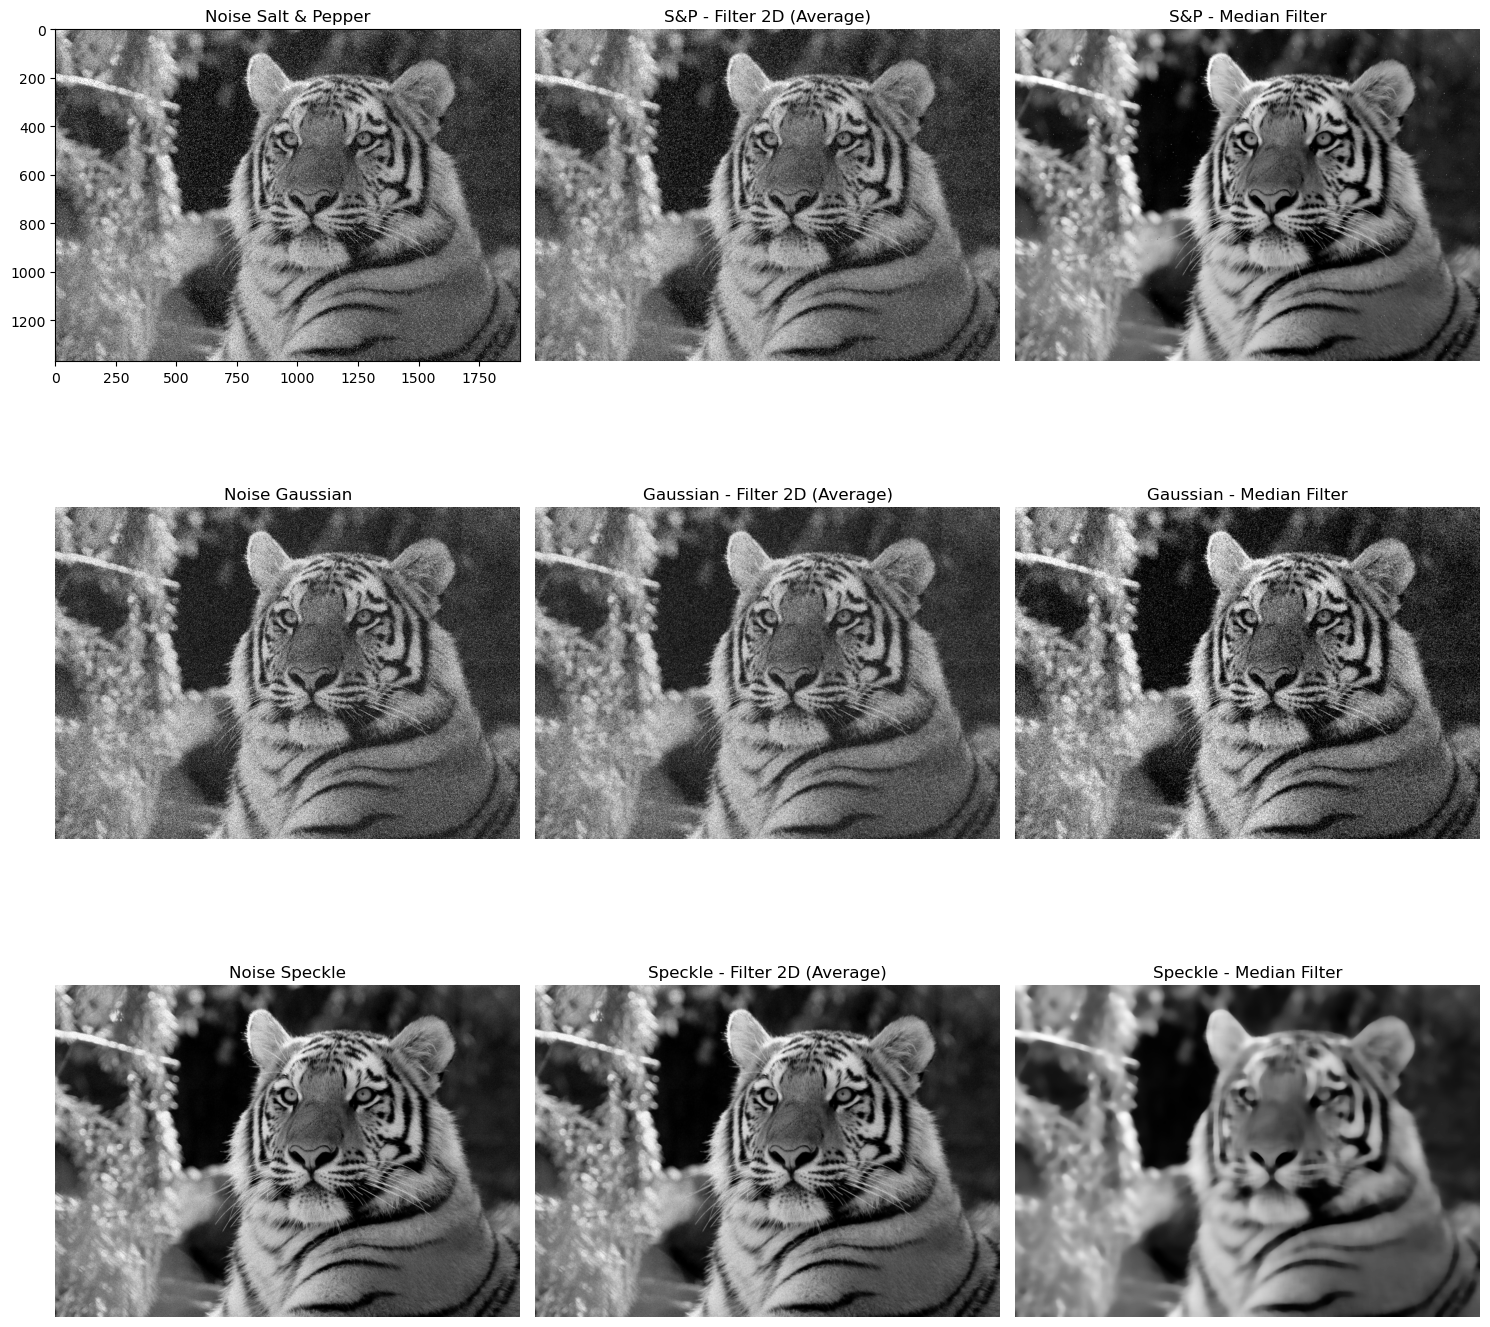

In [40]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 3 baris x 3 kolom
ax = axs.ravel()  # ubah jadi array 1 dimensi untuk akses mudah

# Baris 1: Salt & Pepper
ax[0].imshow(noise_img_snp, cmap="gray")
ax[0].set_title("Noise Salt & Pepper")
# ax[0].axis("off")

ax[1].imshow(img_snp_avg_filter, cmap="gray")
ax[1].set_title("S&P - Filter 2D (Average)")
ax[1].axis("off")

ax[2].imshow(img_snp_median_filter, cmap="gray")
ax[2].set_title("S&P - Median Filter")
ax[2].axis("off")

# Baris 2: Gaussian
ax[3].imshow(noise_img_gaussian, cmap="gray")
ax[3].set_title("Noise Gaussian")
ax[3].axis("off")

ax[4].imshow(img_gaussian_avg_filter, cmap="gray")
ax[4].set_title("Gaussian - Filter 2D (Average)")
ax[4].axis("off")

ax[5].imshow(img_gaussian_median_filter, cmap="gray")
ax[5].set_title("Gaussian - Median Filter")
ax[5].axis("off")

# Baris 3: Speckle
ax[6].imshow(noise_img_speckle, cmap="gray")
ax[6].set_title("Noise Speckle")
ax[6].axis("off")

ax[7].imshow(img_speckle_avg_filter, cmap="gray")
ax[7].set_title("Speckle - Filter 2D (Average)")
ax[7].axis("off")

ax[8].imshow(img_speckle_median_filter, cmap="gray")
ax[8].set_title("Speckle - Median Filter")
ax[8].axis("off")

plt.tight_layout()
plt.show()
